# Part 1: Fully-Connected Neural Nets with PyTorch

Ensure that PyTorch is installed before this section, as we will utilize this powerful library.

For installation when running locally, check this link - [https://pytorch.org/get-started/locally/](https://pytorch.org/get-started/locally/)

In [65]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
from torchvision.ops import MLP

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# TODO: Review PyTorch concepts from HW3

In [66]:
# Load MNIST data and convert to a useful representation. We do this for you,
# but do you understand why these are necessary?
data = datasets.MNIST(root='../data', download=True)
X = data.data
y = data.targets

# Flatten the 28x28 pixel images
X = X.reshape(X.shape[0], -1)

# Encode the target labels into one-hot representations
encoder = OneHotEncoder()
y = encoder.fit_transform(y.reshape(-1, 1)).toarray()

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# TODO: Convert X and y to PyTorch tensors of the appropriate type
X = torch.tensor(X,dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

Using device: cpu


In [67]:
# TODO: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train = torch.tensor(X_train, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.float32)
X_test = torch.tensor(X_test,dtype= torch.float32)
y_test = torch.tensor(y_test,dtype = torch.float32)

/var/folders/yl/zq1mwyws615f4k4wpt2cx3wh0000gn/T/ipykernel_90944/3367661522.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype = torch.float32)
/var/folders/yl/zq1mwyws615f4k4wpt2cx3wh0000gn/T/ipykernel_90944/3367661522.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype = torch.float32)
/var/folders/yl/zq1mwyws615f4k4wpt2cx3wh0000gn/T/ipykernel_90944/3367661522.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test,dtype= torch.float32)

A good example of building neural networks with PyTorch is available at the following link: [https://pytorch.org/tutorials/recipes/recipes/defining_a_neural_network.html](https://pytorch.org/tutorials/recipes/recipes/defining_a_neural_network.html)

In [68]:
# TODO: Define the Fully Connected Neural Network class including an __init__ function and a forward function
class FullyConnectedNN(nn.Module):
    # TODO: create a hidden layer, output layer, and ReLU activation function
    def __init__(self, input_size, hidden_size, output_size):
        super(FullyConnectedNN,self).__init__()
        self.fl1 = nn.Linear(input_size, hidden_size)
        self.fl2 = nn.Linear(hidden_size, output_size)
        self.ReLu = nn.ReLU()

    # TODO: pass through the layers, then apply softmax activation function along the correct dimension
    def forward(self, x):
        x = self.fl1(x)
        x = self.ReLu(x)
        x = self.fl2(x)

        x = torch.softmax(x,dim=1)

        return x


In [69]:
# Set model parameters
input_size = X_train.shape[1]

# TODO: Specify the number of neurons in the hidden layer
# What is an appropriate number of neurons? You should experiment until you
# get good accuracy. We will investigate this more in terms of
# underfitting and overfitting in Part 3.

hidden_size = 14

output_size = y_train.shape[1]

# TODO: Specify a good learning rate.
learning_rate = 0.001

In [70]:
# Initialize the model with the specified parameters
model = FullyConnectedNN(input_size, hidden_size, output_size)

# TODO: Define a suitable loss function and an optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),learning_rate )

In [71]:
def train_model(model, X_train, y_train, epochs):
    for epoch in range(epochs):
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(X_train)

        # TODO: Compute loss
        loss = criterion(y_pred, y_train)

        # TODO: Compute the gradient and apply the gradient using the optimizer
        loss.backward()
        optimizer.step()

        # Gather data and print every 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

# Train the model
train_model(model, X_train, y_train, epochs=1000)

Epoch 100/1000, Loss: 1.6816
Epoch 200/1000, Loss: 1.5818
Epoch 300/1000, Loss: 1.5541
Epoch 400/1000, Loss: 1.5399
Epoch 500/1000, Loss: 1.5308
Epoch 600/1000, Loss: 1.5242
Epoch 700/1000, Loss: 1.5192
Epoch 800/1000, Loss: 1.5152
Epoch 900/1000, Loss: 1.5119
Epoch 1000/1000, Loss: 1.5091


In [72]:
# Evaluate the model
def evaluate_model(model, X_test, y_test):
    with torch.no_grad():
        y_pred = model(X_test)
        y_pred_classes = torch.argmax(y_pred, axis=1)
        y_true_classes = torch.argmax(y_test, axis=1)
        accuracy = str(torch.mean((y_pred_classes == y_true_classes).float()).item())
        return accuracy

# Evaluate on the test set
print('Test Accuracy: ' + evaluate_model(model, X_test, y_test))

# TODO: If your accuracy is below 0.9 or training is taking a long time,
# experiment with different options for your choices above, or double-check
# your understanding of course materials

Test Accuracy: 0.9371333122253418


# Part 2: Fully-Connected Neural Network using NumPy

To achieve full points for this part, your test data must be predicted with an accuracy of over 90%.
PLEASE CITE ANY ONLINE RESOURCES USED AS A COMMENT IN YOUR CODE

In [73]:
import numpy as np

In [74]:
# TODO: Use data from Part 1, or reload MNIST data in a similar way
X = data.data
y = data.targets

# Convert PyTorch tensors to NumPy arrays
X_train_np = X_train.detach().cpu().numpy()
y_train_np = y_train.detach().cpu().numpy()
X_test_np  = X_test.detach().cpu().numpy()
y_test_np  = y_test.detach().cpu().numpy()

In [75]:
def relu(x):
    # TODO: Implement the ReLU function in numpy
    formula = np.maximum(0,x)
    return formula

def relu_derivative(x):
    # TODO: Implement the derivative of the ReLU function in numpy
    derivative = (x > 0)*1
    return derivative

In [76]:
def softmax(x):
    # TODO: Implement the softmax function
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  

    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


In [77]:
def compute_loss(y_true, y_pred):
    """Categorical Crossentropy Loss."""
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-8), axis=1))


In [78]:
# Define the Fully Connected Network class
class FullyConnectedNN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        """Initialize the network parameters."""
        self.learning_rate = learning_rate
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.1
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.1
        self.bias_output = np.zeros((1, output_size))

    def forward(self, X):
        """Perform forward propagation."""
        self.input = X

        # TODO: Compute the hidden layer output
        # Combine the inputs (X) and weights_input_hidden, then add the bias for the hidden layer
        self.hidden_input = self.input @ self.weights_input_hidden + self.bias_hidden

        # TODO: Apply the ReLU activation function to the hidden layer input to get the hidden layer output
        self.hidden_output = relu(self.hidden_input)

        # TODO: Compute the output layer's output
        # Combine the hidden layer output and weights_hidden_output, then add the bias for the output layer
        self.output_input = self.hidden_output @ self.weights_hidden_output + self.bias_output

        # TODO: Apply the softmax function to the output
        self.output = softmax(self.output_input)

        return self.output


    def backward(self, y_true):
        """Perform backward propagation and update parameters."""
        m = y_true.shape[0]
        # Calculate gradients for the output layer
        # TODO: get the error in the output layer
        # (HINT: you have already calculated the output (which is the predictions), and you have access to the true labels)
        output_error = self.output - y_true

        # TODO: compute the gradients for the output layer
        # HINT: need to compute the dot product of the hidden layer output and the output error
        # Be careful with the dimensions of the matrices (you may need to transpose one of them)
        d_weights_hidden_output = self.hidden_output.T @ output_error / m

        # TODO: compute the gradients for the output layer bias
        # HINT: the bias is a vector of ones, so you can simply sum the output error
        d_bias_output = np.sum(output_error, axis=0, keepdims=True) / m

        # Calculate gradients for the hidden layer
        # TODO: compute the error in the hidden layer
        # HINT: you need to compute the dot product of the output error and the weights_hidden_output and be mindful of the dimensions
        # multiply the result by the derivative of the ReLU function applied to the hidden layer output
        hidden_error = (output_error @ self.weights_hidden_output.T) * relu_derivative(self.hidden_input)

        # TODO: compute the gradients for the hidden layer weights
        # HINT: need to compute the dot product of the input and the hidden error, and be mindful of the dimensions
        d_weights_input_hidden = self.input.T @ hidden_error

        # TODO: compute the gradients for the hidden layer bias
        d_bias_hidden = np.sum(hidden_error, axis=0, keepdims=True)    

        # TODO: Update weights and biases
        # This will be done using the gradients computed above and the learning rate
        self.weights_hidden_output -= self.learning_rate * d_weights_hidden_output
        self.bias_output -= self.learning_rate * d_bias_output
        self.weights_input_hidden -= self.learning_rate * d_weights_input_hidden
        self.bias_hidden -= self.learning_rate * d_bias_hidden

    def train(self, X, y, epochs):
        """Train the network for a number of epochs."""
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)

            # Compute loss
            loss = compute_loss(y, y_pred)

            # Backward pass
            self.backward(y)

            # Print loss every 100 epochs
            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    def predict(self, X):
        """Predict the class labels for given inputs."""
        probabilities = self.forward(X)
        return np.argmax(probabilities, axis=1)

In [79]:
# Instantiate and train the network
input_size = X_train.shape[1]

# TODO: Specify the number of neurons in the hidden layer
hidden_size = 14

output_size = y_train.shape[1]

# TODO: Choose a good learning rate
learning_rate = 0.001


In [80]:
net = FullyConnectedNN(input_size, hidden_size, output_size, learning_rate)
net.train(X_train_np, y_train_np, epochs=1000)

Epoch 100/1000, Loss: 0.2523
Epoch 200/1000, Loss: 0.2101
Epoch 300/1000, Loss: 0.1922
Epoch 400/1000, Loss: 0.1757
Epoch 500/1000, Loss: 0.1642
Epoch 600/1000, Loss: 0.1562
Epoch 700/1000, Loss: 0.1488
Epoch 800/1000, Loss: 0.1430
Epoch 900/1000, Loss: 0.1383
Epoch 1000/1000, Loss: 0.1342


In [81]:
# Evaluate the model on the test set
y_pred = net.predict(X_test_np)
y_true = np.argmax(y_test_np, axis=1)
accuracy = np.mean(y_pred == y_true)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9219


# Part 3: Overfitting and Underfitting

In this section we will experiment with GPUs, Overfitting, and Underfitting.

In [82]:
# TODO: Review documentation about using CUDA for data and neural networks.
# In addition to lecture materials, we recommend the following:
# - Very brief overviews:
#   - https://docs.pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#tensor-operations
#   - https://docs.pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#training-on-gpu
# - More in-depth:
#   - https://docs.pytorch.org/docs/stable/tensor_attributes.html#torch.device
#   - https://docs.pytorch.org/docs/stable/notes/cuda.html

# TODO: Make sure you are using a GPU runtime. Do this using the settings
# at the top of the colab page: Runtime > Change Runtime Type
# You will need to re-run your cells, and make sure that your device is "cuda"
# in the second cell from the top of the page

# TODO: Move the following data to cuda, and take their dot product.
# Ensure that their result also automatically has the device of "cuda"
x = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)
y = torch.tensor([5, 4, 3, 2, 1], dtype=torch.float32)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

x = x.to(device)
y = y.to(device)

z = torch.dot(x,y)

print(f"Device of x: {x.device}")
print(f"Device of y: {y.device}")
print(f"\nDot product (z): {z}")
print(f"Device of z: {z.device}")

Device of x: cpu
Device of y: cpu

Dot product (z): 35.0
Device of z: cpu


In [83]:
# The MLP model is a shortcut for specifying the NN you did in Part 1, and it also
# allows for more layers. Specifically, the hidden_channels array specifies
# the number of neurons in each layer (after the input layer), so you can modify
# this array to make wider layers, or add more layers
# This starter model should be roughly the same as your model from above

model = MLP(
    in_channels=input_size,
    hidden_channels=[hidden_size, output_size],
    activation_layer=nn.ReLU,
).to(device)

# TODO: Move your data and model from part 1 to the GPU (this should be simple, ~2 lines of code)
model.to(device)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device) 
y_test = y_test.to(device)


In [84]:
# TODO: Modify your training and/or evaluation code from above to gather data
# about the accuracy of your model on both the train AND test datasets every
# 100 epochs. It's useful to put this in two arrays, so it can be used
# for plotting below. Train the MLP model using this code, and print out the
# accuracy data

num_epochs = 1000
train_acc_list = []
test_acc_list = []
epoch_list = []


y_train_indices = torch.argmax(y_train, dim=1)
y_test_indices = torch.argmax(y_test, dim=1)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


for epoch in range(1, num_epochs + 1):
    # Training phase 
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_train)
    # Use the 1D index tensor for CrossEntropyLoss
    loss = criterion(outputs, y_train_indices) 
    
    # Backward pass + update
    loss.backward()
    optimizer.step()
    
    # Every 100 epochs: record accuracy 
    if epoch % 100 == 0:
        model.eval()
        with torch.no_grad():
            # Recompute on full train set
            train_outputs = model(X_train)
            train_pred = train_outputs.argmax(dim=1)

            # Compare predictions with true labels 
            train_acc = (train_pred == y_train_indices).float().mean().item()
            
            # Compute on test set
            test_outputs = model(X_test)
            test_pred = test_outputs.argmax(dim=1)
            
            # Compare predictions with true labels
            test_acc = (test_pred == y_test_indices).float().mean().item()
            
            epoch_list.append(epoch)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            
            print(f"Epoch {epoch}/{num_epochs} "
                  f"Loss: {loss.item():.4f}, "
                  f"Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

# After training
print("\nTrain accuracies:", train_acc_list)
print("Test accuracies:", test_acc_list)


Epoch 100/1000 Loss: 0.4917, Train Acc: 0.8758, Test Acc: 0.8721
Epoch 200/1000 Loss: 0.2997, Train Acc: 0.9140, Test Acc: 0.9102
Epoch 300/1000 Loss: 0.2461, Train Acc: 0.9282, Test Acc: 0.9227
Epoch 400/1000 Loss: 0.2160, Train Acc: 0.9375, Test Acc: 0.9271
Epoch 500/1000 Loss: 0.1948, Train Acc: 0.9436, Test Acc: 0.9304
Epoch 600/1000 Loss: 0.1792, Train Acc: 0.9482, Test Acc: 0.9332
Epoch 700/1000 Loss: 0.1667, Train Acc: 0.9515, Test Acc: 0.9347
Epoch 800/1000 Loss: 0.1565, Train Acc: 0.9545, Test Acc: 0.9348
Epoch 900/1000 Loss: 0.1477, Train Acc: 0.9572, Test Acc: 0.9351
Epoch 1000/1000 Loss: 0.1400, Train Acc: 0.9595, Test Acc: 0.9355

Train accuracies: [0.8758222460746765, 0.9140222072601318, 0.9281777739524841, 0.9374666810035706, 0.943577766418457, 0.948199987411499, 0.9514889121055603, 0.9545111060142517, 0.9571777582168579, 0.9594888687133789]
Test accuracies: [0.8720666766166687, 0.9101999998092651, 0.9227333068847656, 0.927133321762085, 0.930400013923645, 0.9332000017166

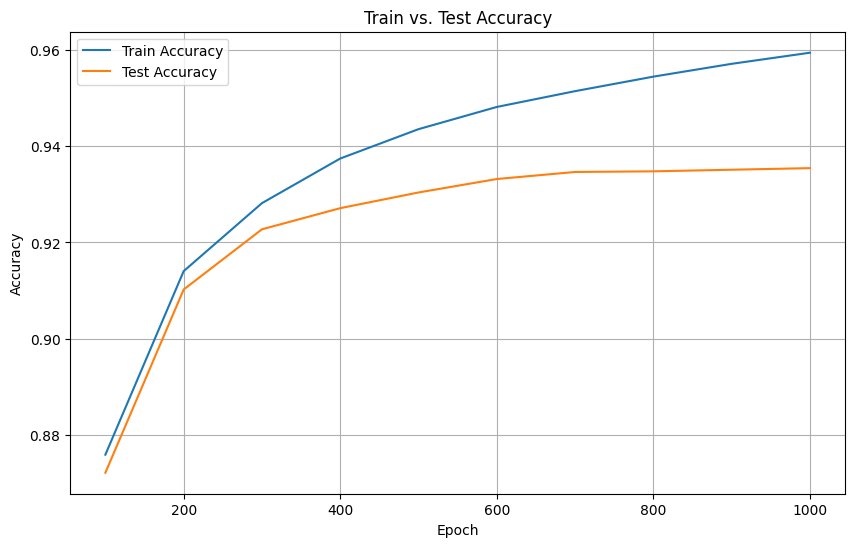

In [85]:
# TODO: Plot train vs. test accuracy for the model above
plt.figure(figsize=(10, 6))
plt.plot(epoch_list, train_acc_list, label='Train Accuracy')
plt.plot(epoch_list, test_acc_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs. Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Epoch 100/1000 Loss: 0.1407, Train Acc: 0.9607, Test Acc: 0.9518
Epoch 200/1000 Loss: 0.0650, Train Acc: 0.9827, Test Acc: 0.9653
Epoch 300/1000 Loss: 0.0316, Train Acc: 0.9937, Test Acc: 0.9697
Epoch 400/1000 Loss: 0.0163, Train Acc: 0.9982, Test Acc: 0.9715
Epoch 500/1000 Loss: 0.0092, Train Acc: 0.9996, Test Acc: 0.9720
Epoch 600/1000 Loss: 0.0057, Train Acc: 0.9999, Test Acc: 0.9725
Epoch 700/1000 Loss: 0.0038, Train Acc: 1.0000, Test Acc: 0.9729
Epoch 800/1000 Loss: 0.0027, Train Acc: 1.0000, Test Acc: 0.9730
Epoch 900/1000 Loss: 0.0020, Train Acc: 1.0000, Test Acc: 0.9731
Epoch 1000/1000 Loss: 0.0016, Train Acc: 1.0000, Test Acc: 0.9733

Train accuracies: [0.9606888890266418, 0.9826889038085938, 0.9936888813972473, 0.998199999332428, 0.9995777606964111, 0.9998888969421387, 0.9999777674674988, 1.0, 1.0, 1.0]
Test accuracies: [0.9517999887466431, 0.9653333425521851, 0.9697333574295044, 0.9715333580970764, 0.972000002861023, 0.9724666476249695, 0.9728666543960571, 0.9729999899864197

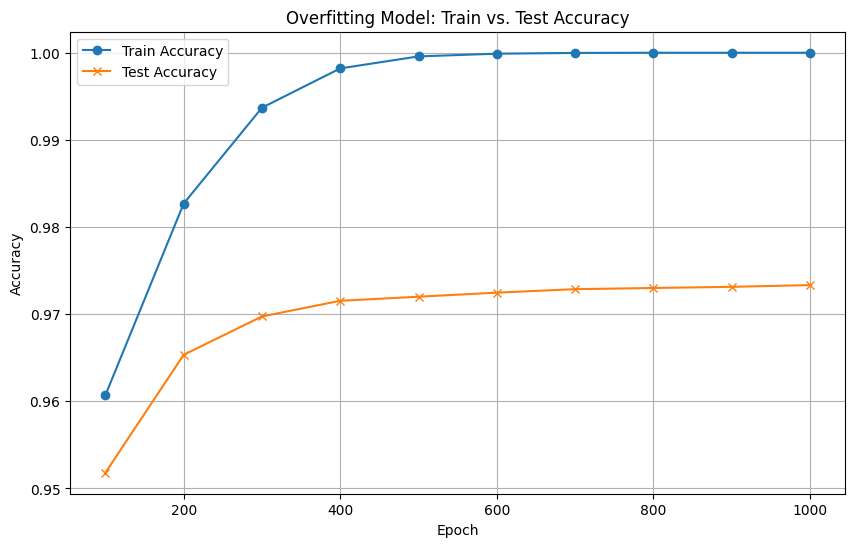

In [ ]:
# TODO: Find a model that is overfit, plots its accuracy, and explain why you know it's overfitting
# Make sure to train on the GPU!

# Define the Overfitting Model

overfit_model = MLP(
    in_channels=input_size,
    hidden_channels=[600,600],
    activation_layer=nn.ReLU,
).to(device)

# Setup Training Parameters
num_epochs = 1000
learning_rate = 0.001

# Reset lists for new model's training data
train_acc_list = []
test_acc_list = []
epoch_list = []
criterion = nn.CrossEntropyLoss()

# Define optimizer for the new overfit_model parameters
optimizer = torch.optim.Adam(overfit_model.parameters(), lr=learning_rate)

# Convert 2D one-hot targets to 1D class indices 
y_train_indices = torch.argmax(y_train, dim=1)
y_test_indices = torch.argmax(y_test, dim=1)


# Training Loop 
for epoch in range(1, num_epochs + 1):
    # Training phase 
    overfit_model.train()
    optimizer.zero_grad()
    outputs = overfit_model(X_train)
    loss = criterion(outputs, y_train_indices) 
    loss.backward()
    optimizer.step()

    # Every 100 epochs: record accuracy 
    if epoch % 100 == 0:
        overfit_model.eval()
        with torch.no_grad():
            # Compute on full train set
            train_outputs = overfit_model(X_train)
            train_pred = train_outputs.argmax(dim=1)
            train_acc = (train_pred == y_train_indices).float().mean().item()

            # Compute on test set
            test_outputs = overfit_model(X_test)
            test_pred = test_outputs.argmax(dim=1)
            test_acc = (test_pred == y_test_indices).float().mean().item()

            epoch_list.append(epoch)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)

            print(f"Epoch {epoch}/{num_epochs} "
                  f"Loss: {loss.item():.4f}, "
                  f"Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

# After training
print("\nTrain accuracies:", train_acc_list)
print("Test accuracies:", test_acc_list)

# Plot the results 
plt.figure(figsize=(10, 6))
plt.plot(epoch_list, train_acc_list, label='Train Accuracy', marker='o')
plt.plot(epoch_list, test_acc_list, label='Test Accuracy', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Overfitting Model: Train vs. Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Epoch 100/1000 Loss: 1.7807, Train Acc: 0.3673, Test Acc: 0.3667
Epoch 200/1000 Loss: 1.6280, Train Acc: 0.4622, Test Acc: 0.4601
Epoch 300/1000 Loss: 1.5233, Train Acc: 0.4731, Test Acc: 0.4669
Epoch 400/1000 Loss: 1.4581, Train Acc: 0.4727, Test Acc: 0.4671
Epoch 500/1000 Loss: 1.4168, Train Acc: 0.4715, Test Acc: 0.4649
Epoch 600/1000 Loss: 1.3874, Train Acc: 0.4709, Test Acc: 0.4643
Epoch 700/1000 Loss: 1.3652, Train Acc: 0.4725, Test Acc: 0.4641
Epoch 800/1000 Loss: 1.3476, Train Acc: 0.4742, Test Acc: 0.4643
Epoch 900/1000 Loss: 1.3330, Train Acc: 0.4764, Test Acc: 0.4671
Epoch 1000/1000 Loss: 1.3212, Train Acc: 0.4794, Test Acc: 0.4693

Train accuracies: [0.367333322763443, 0.46222221851348877, 0.47306665778160095, 0.4727333188056946, 0.4715111255645752, 0.47086668014526367, 0.47246667742729187, 0.4741555452346802, 0.47635555267333984, 0.47937777638435364]
Test accuracies: [0.36666667461395264, 0.4601333439350128, 0.466866672039032, 0.4670666754245758, 0.46486666798591614, 0.464

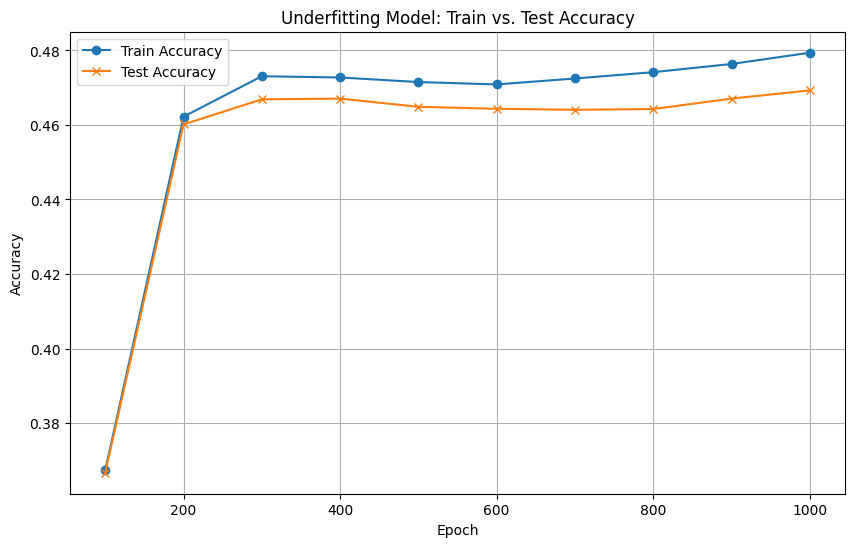

In [87]:
# TODO: Find a model that is underfit, plots its accuracy, and explain why you know it's underfitting

# Define the Underfitting Model
underfit_model = MLP(
    in_channels=input_size,
    hidden_channels=[2,output_size],
    activation_layer=nn.ReLU,
).to(device)

# Setup Training Parameters
num_epochs = 1000
learning_rate = 0.001

# Reset lists for new model's training data
train_acc_list = []
test_acc_list = []
epoch_list = []
criterion = nn.CrossEntropyLoss()

# Define optimizer for the new overfit_model parameters
optimizer = torch.optim.Adam(underfit_model.parameters(), lr=learning_rate)

# Convert 2D one-hot targets to 1D class indices 
y_train_indices = torch.argmax(y_train, dim=1)
y_test_indices = torch.argmax(y_test, dim=1)


# Training Loop 
for epoch in range(1, num_epochs + 1):
    # Training phase 
    underfit_model.train()
    optimizer.zero_grad()
    outputs = underfit_model(X_train)
    loss = criterion(outputs, y_train_indices) 
    loss.backward()
    optimizer.step()

    # Every 100 epochs: record accuracy 
    if epoch % 100 == 0:
        underfit_model.eval()
        with torch.no_grad():
            # Compute on full train set
            train_outputs = underfit_model(X_train)
            train_pred = train_outputs.argmax(dim=1)
            train_acc = (train_pred == y_train_indices).float().mean().item()

            # Compute on test set
            test_outputs = underfit_model(X_test)
            test_pred = test_outputs.argmax(dim=1)
            test_acc = (test_pred == y_test_indices).float().mean().item()

            epoch_list.append(epoch)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)

            print(f"Epoch {epoch}/{num_epochs} "
                  f"Loss: {loss.item():.4f}, "
                  f"Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

# After training
print("\nTrain accuracies:", train_acc_list)
print("Test accuracies:", test_acc_list)

# Plot the results 
plt.figure(figsize=(10, 6))
plt.plot(epoch_list, train_acc_list, label='Train Accuracy', marker='o')
plt.plot(epoch_list, test_acc_list, label='Test Accuracy', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Underfitting Model: Train vs. Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()